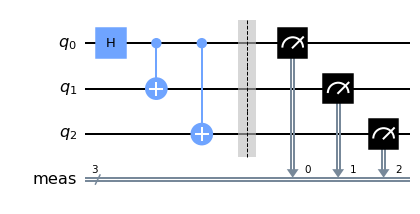

In [2]:
# Creating a Quantum Program called a 'Quantum Circuit'
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,[1,2])
qc.measure_all()
display(qc.draw())

In [6]:
# Saving my IBMQ token 
from qiskit import IBMQ

In [8]:
# Now I am ready to access Quantum devices from IBM
IBMQ.save_account('f7ed8b199a6958faaf47b2d6f1a349bb11fb7dec50ce5c5d0edf6e6d7c6b3f568d227dfbefacda6acd0b39a90d06954508892d19d2255e990500f758187fab8a')

configrc.store_credentials:WARNING:2022-09-08 06:28:28,843: Credentials already present. Set overwrite=True to overwrite.


In [9]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [10]:
# Now we will be able to some computation on real Quantum Computer
# Asking IBM Quantum for it's least busy device that isn't a simulator
from qiskit.providers.ibmq import IBMQ, least_busy
provider = IBMQ.get_provider('ibm-q')
device = least_busy(provider.backends(filters=lambda x: not x.configuration().simulator))
print(f'Running on {device.name()}')

Running on ibmq_belem


In [11]:
# Forming the program so that the device can run it
# It is known as transpiling

from qiskit import  transpile
transpiled_qc = transpile(qc, device)

In [12]:
# Sending the program off to the IBM Quantum to run on a real device
# and monitoring its status

from qiskit.tools import job_monitor
job = device.run(transpiled_qc)
job_monitor(job)

Job Status: job has successfully run


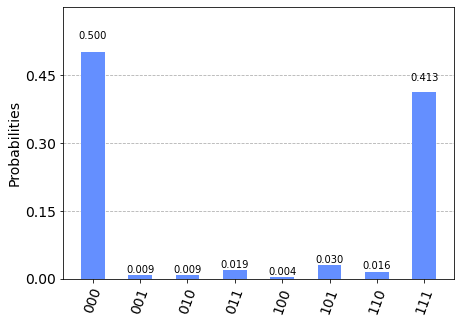

In [13]:
# Plotting the result as histogram
from qiskit.visualization import plot_histogram
plot_histogram(job.result().get_counts())